## Bilateral Connections in Networks

A network is represented by an $n \times n$ adjacency matrix $A$ with elements $a_{ij}$. I consider a directed, weighted and possibly signed network, which means that $a_{ij} \in [-1,1]$ shows the sign and strength of the link from cross-sectional unit $i$ to unit $j$, with $a_{ij} \neq a_{ji}$ possibly. If $a_{ij} = 0$, I say unit $i$ is not connected to unit $j$. Self-links $a_{ii} \neq 0$ are permitted. The set of bilateral links $\{a_{ij}\}_{i,j=1:n}$ give rise to a plethora of higher-order connections among units, referred to as walks. Whenever convenient to simplify notation, I write $a : b$ for the set of integers $ \{a, a + 1, \ldots, b\} $, $a \leq b$.

### Definition: Walk

A walk from $i$ to $j$ of length $K$ is the product of a sequence of $K$ links $a_{i_k,i_{k+1}}$ between units $i_1, i_2, \ldots, i_{K-1}$ such that $a_{i_k,i_{k+1}} \neq 0$ for $k = 1 : K - 2$, with $i_1 = i$, $i_K - 1 = j$:
$$
a_{i,i_2,\ldots,i_{K-2},j} = \prod_{k=1}^{K-2} a_{i_k, i_{k+1}}.
$$

Put simply, a walk is the product of bilateral links $a_{ij}$ that lead from unit $i$ to unit $j$ over some intermediary units, all of which are sequentially connected. Just as element $(i, j)$ in the matrix $A$ shows the walk from $i$ to $j$ of length one (direct link), simple matrix algebra reveals that $(A^K)_{ij}$ contains the sum of walks from $i$ to $j$ of length $K$. In the case of an unweighted and unsigned network, $a_{ij} \in \{0, 1\}$ and so any walk $a_{i,i_2,\ldots,i_{K-1},j} \in \{0, 1\}$, which means that $(A^K)_{ij}$ contains the number of walks from $i$ to $j$. I refer to this quantity as the $K$th-order connection from $i$ to $j$.

### Example

Consider the following example:

$$
A = \begin{bmatrix} 0 & 0 & 0.8 \\ 0.7 & 0 & 0.2 \\ 0 & 0.9 & 0 \end{bmatrix}, \quad A^2 = \begin{bmatrix} 0 & 0.72 & 0 \\ 0 & 0.18 & 0.56 \\ 0.63 & 0 & 0.18 \end{bmatrix}, \quad A^3 = \begin{bmatrix} 0.50 & 0 & 0.14 \\ 0.13 & 0.50 & 0.04 \\ 0 & 0.16 & 0.50 \end{bmatrix}.
$$

Even though unit 3 is not directly connected to unit 1 ($a_{31} = 0$), there exists a second-order connection via unit 2 ($a_{32}a_{21} \neq 0$). For example, in a production network, unit 1 could be a supplier to unit 2, who in turn is a supplier to unit 3.

## Lagged Innovation Transmission via Bilateral Links

The core assumption that underlies the proposed NVAR is that innovations $u_{it}$ to a process $y_{it}$ transmit cross-sectionally only via bilateral links. I assume that links are fixed and this transmission operates only in one direction through the network; the direct link from $i$ to $j$, $a_{ij}$, transmits innovations from $j$ to $i$. Innovations can be cross-sectionally correlated. To simplify the exposition, I assume $\mathbb{E}[y_{it}] = 0 \; \forall \; i, t$.

### Single Lag in Innovation Transmission: NVAR(1,1)

Consider the following VAR(1) for the cross-sectional time series $y_t = (y_{1t}, \ldots, y_{nt})'$:

$$
y_t = \Phi y_{t-1} + u_t, \quad u_t \sim WN(0, \Sigma), \quad \text{with} \quad \Phi = \alpha A, \quad \alpha \in \mathbb{R}. \tag{1}
$$

If $\Phi$ is proportional to an adjacency matrix $A$ containing cross-sectional linkages, one obtains a process that relates the dynamics of the cross-sectional time series $y_t$ to the bilateral links among cross-sectional units. Following Long and Plosser (1983), in Section 4 I derive such a process for sectoral output and prices in an RBC production economy with a one period delay in converting inputs into output. Golub and Jackson (2010) posit it to study societal opinion formation through friendship ties.

Under this process, the one period-ahead expectation of $y_{it}$ is proportional to a weighted sum of one period-lagged values of $y_{jt}$ for all units $j$ to which $i$ is directly linked, with weights given by the strength of direct links $a_{ij}$. $\mathbb{E}_{t-1}[y_{it}] = \alpha \sum_{j=1}^{n} a_{ij}y_{j,t-1}$. For example, in Long and Plosser (1983), the expected output tomorrow in sector $i$ is a weighted average of the production in its supplier-sectors $j$ today. Dynamics of $y_t$, as summarized by Granger-causality at horizons $h = 1, 2, \ldots$, are shaped by $h$th order network-connections:

$$
GC_{ij}^{h} \equiv \frac{\partial y_{i,t+h}}{\partial y_{jt}} = \frac{\partial y_{i,t+h}}{\partial u_{jt}} = \left[ \alpha^h A^h \right]_{ij}.
$$

As a result, given all other variables $y_k$, $k \neq j$, $y_j$ is useful in forecasting $y_i$ at horizon $h$ iff there is an $h$th order connection from $i$ to $j$. $GC_{ij}^h$ is also referred to as the Generalized Impulse Response Function (GIRF). It is generalized because it is not concerned with shock identification, but the derivative is taken with respect to potentially correlated reduced form errors in $u_t$.

Fig. 1 provides an example. It depicts the GIRFs for the process in Eq. (1) and the network from Section 2.1 for $\alpha = 1$. Each panel $(i, j)$ shows $GC_{ij}^h = [A^h]_{ij}$ for $h = 0 : 6$. By definition, the contemporaneous responses to all but a series’ own innovation are zero. From horizon $h = 1$ onwards, $GC_{ij}^h$ equals the network connections from $i$ to $j$ of order $h$.

Two points are worth highlighting. First, lagged network interactions can be a source of persistence, at the individual as well as aggregate level. Even without autocorrelation in disturbances $u_{jt}$, the responses of $\{y_{it}\}_{i=1}^n$ are persistent because disturbances $u_{jt}$ reach connected units $i \neq j$ only with a lag. Even without self-links $\{a_{jj} = 0\}$, the response of unit $j$ itself is persistent as well so long as there are cycles in the network, i.e., walks from $j$ to $j$. This is behind the endogenous business cycles in Long and Plosser (1983) and contrasts with dynamics under contemporaneous network interactions. Nevertheless, dynamics under the two environments are related, as discussed in Section 2.2.4. Second, under this source of persistence, network-connections between $i$ and $j$ shape not only the strength of the impulse-response, but also its timing. For example, while unit 2 is directly linked to unit 1 and therefore experiences the latter’s innovation with a lag of one period, unit 3 only has an indirect, second-order connection to unit 1 and is therefore impacted by its innovation only after two periods.

These results relate to the discussion in Dufour and Renault (1998), who point out that Granger-causality can take the form of chains. Specifically, even if a series $x_t$ does not Granger-cause a series $y_t$ at horizon 1, under the presence of a third series $z_t$, $x_t$ might Granger-cause $y_t$ at higher horizons as the causality could run from $x_t$ to $z_t$ to $y_t$. They examine conditions under which noncausality at a given horizon implies noncausality at higher horizons. If innovations transmit only via bilateral links, these generally non-trivial conditions boil down to the existence of network connections of relevant order between the concerned variables (cross-sectional units).

While useful for theoretical insights, the process in Eq. (1) is of limited use empirically as it entertains a very restrictive mapping between network connections and observed dynamics in $y_t$. First, it assumes that innovations travel through the network at the speed of one link per period. This is restrictive, as the frequency of observations might not coincide with the frequency of network interactions. For instance, it implies that a sector $i$'s output does not react to innovations at suppliers situated two positions upstream of $i$ ("suppliers of suppliers") but after two (observational) periods. Second, it assumes complete transmission at a single lag. For example, after an innovation at a supplier $j$, a sector $i$ fully adjusts its production after one period. Subsequent adjustments only occur if $j$ is also a supplier to other suppliers of $i$, whose adjustments to $j$ induce further adjustments of $i$ (or if the innovation is persistent; see Section 4.1). In the following, I extend the simple process above along both of these two dimensions.


Estimation of α: 1.0071 (True: 1.0)

Verification for Matrix A^3:
Calculation results:
[[0.51 0.   0.15]
 [0.13 0.51 0.04]
 [0.   0.17 0.51]]

Example in the Paper:
[[0.5  0.   0.14]
 [0.13 0.5  0.04]
 [0.   0.16 0.5 ]]


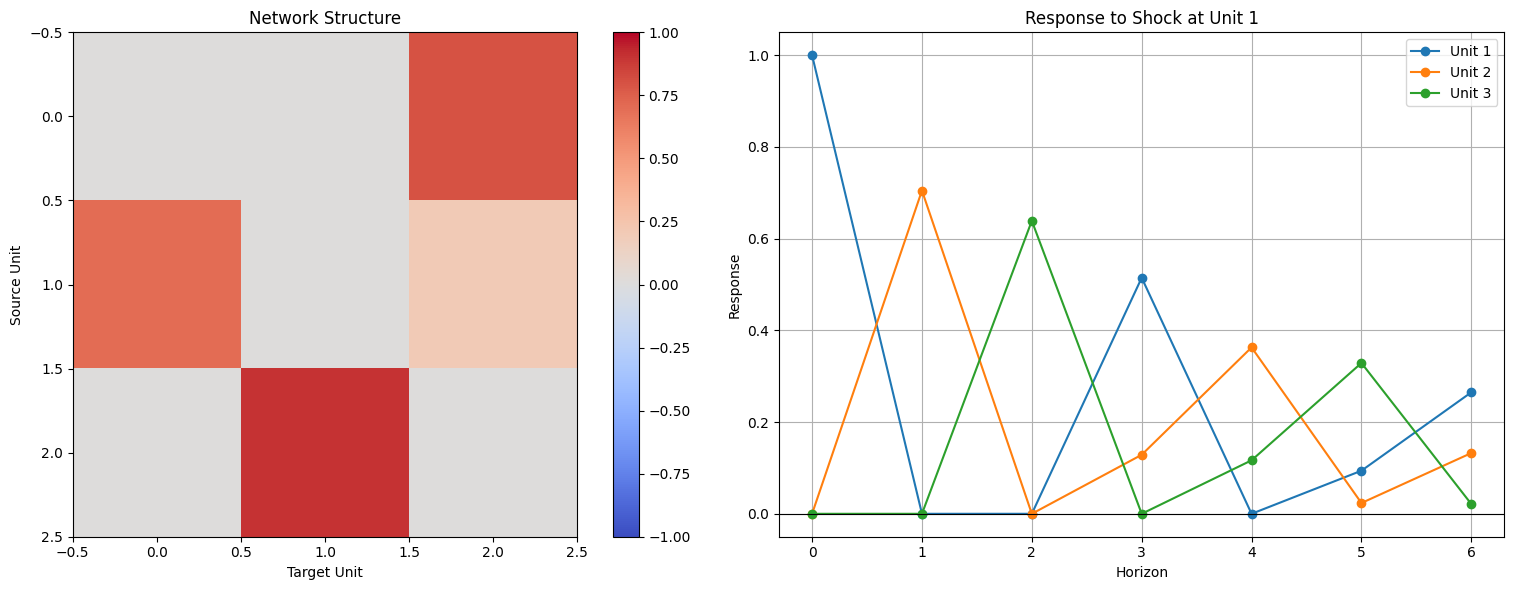

In [3]:
"""
@author: fawdywahyu
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz

# ========================
# 1. SIMULASI DATA NVAR(1,1) - DIPERBARUI
# ========================

def simulate_nvar(A, alpha, T=100, sigma_u=0.1, burn_in=100, seed=None):
    """
    Simulasi data dari model NVAR(1,1) dengan periode burn-in
    
    Parameters:
        A (np.ndarray): Matriks adjacency jaringan (n x n)
        alpha (float): Parameter autoregressive
        T (int): Jangka waktu
        sigma_u (float): Standar deviasi inovasi
        burn_in (int): Periode stabilisasi awal
        seed (int): Seed untuk random generator
    """
    if seed is not None:
        np.random.seed(seed)
    
    n = A.shape[0]
    total_T = T + burn_in
    y = np.zeros((total_T, n))
    u = np.random.normal(0, sigma_u, (total_T, n))
    
    # Inisialisasi dengan nilai kecil untuk stabilitas
    y[0] = np.random.normal(0, 0.1, n)
    
    for t in range(1, total_T):
        y[t] = alpha * (A @ y[t-1]) + u[t]
    
    return y[burn_in:]

# ========================
# 2. ESTIMASI PARAMETER α - DIPERBARUI
# ========================

def estimate_alpha(A, Y):
    """
    Estimasi parameter α menggunakan OLS dengan regularisasi ridge
    
    Parameters:
        A (np.ndarray): Matriks adjacency jaringan
        Y (np.ndarray): Data time series (T x n)
    """
    Y_lag = Y[:-1]  # y_{t-1}
    Y_current = Y[1:]  # y_t
    
    # Bentuk matriks desain dengan vektorisasi
    X = (A @ Y_lag.T).T.reshape(-1, 1)
    y = Y_current.reshape(-1)
    
    # Regresi ridge untuk stabilitas numerik
    alpha = np.linalg.lstsq(X.T @ X + 1e-6*np.eye(1), X.T @ y, rcond=None)[0][0]
    
    return alpha

# ==================================
# 3. FUNGSI IMPULSE RESPONSE (GIRF) - DIPERBARUI
# ==================================

def compute_girf(A, alpha, h_max):
    """
    Menghitung Generalized Impulse Response Function dengan tracking walk
    
    Parameters:
        A (np.ndarray): Matriks adjacency
        alpha (float): Parameter autoregressive
        h_max (int): Horizon maksimum
    """
    n = A.shape[0]
    girf = [np.eye(n)]  # h=0
    
    # Precompute semua pangkat matriks
    A_powers = [np.eye(n)]
    for h in range(1, h_max+1):
        A_powers.append(A @ A_powers[-1])
    
    for h in range(1, h_max+1):
        current = (alpha**h) * A_powers[h]
        girf.append(current)
    
    return girf

# ====================
# 4. CONTOH JARINGAN - DIPERBARUI
# ====================

def example_network(signed=False):
    """Jaringan contoh dari paper dengan opsi signed network"""
    if signed:
        return np.array([
            [0.0, 0.0, 0.8],
            [-0.7, 0.0, 0.2],
            [0.0, 0.9, 0.0]
        ])
    return np.array([
        [0.0, 0.0, 0.8],
        [0.7, 0.0, 0.2],
        [0.0, 0.9, 0.0]
    ])

# ====================
# 5. VISUALISASI GIRF - DIPERBARUI
# ====================

def plot_girf(girf, A, shock_unit=0, h_max=6):
    """
    Plot impulse response dengan informasi jaringan
    """
    n = girf[0].shape[0]
    horizons = list(range(h_max + 1))
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot struktur jaringan
    im = ax1.imshow(A, cmap='coolwarm', vmin=-1, vmax=1)
    ax1.set_title('Network Structure')
    ax1.set_xlabel('Target Unit')
    ax1.set_ylabel('Source Unit')
    plt.colorbar(im, ax=ax1)
    
    # Plot impulse responses
    for i in range(n):
        responses = [girf[h][i, shock_unit] for h in range(h_max + 1)]
        ax2.plot(horizons, responses, marker='o', label=f'Unit {i+1}')
    
    ax2.set_title(f'Response to Shock at Unit {shock_unit+1}')
    ax2.set_xlabel('Horizon')
    ax2.set_ylabel('Response')
    ax2.axhline(0, color='black', linewidth=0.8)
    ax2.grid(True)
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

# ==========================
# 6. DEMO DENGAN CONTOH PAPER - DIPERBARUI
# ==========================

if __name__ == "__main__":
    # Parameter contoh sesuai paper
    A = example_network()
    alpha_true = 1.0  # Sesuai contoh di paper
    h_max = 6
    burn_in = 100
    T = 500
    
    # Simulasi data
    Y = simulate_nvar(A, alpha_true, T=T, burn_in=burn_in, seed=42)
    
    # Estimasi α
    alpha_est = estimate_alpha(A, Y)
    print(f"Estimation of α: {alpha_est:.4f} (True: {alpha_true})")
    
    # Hitung GIRF
    girf = compute_girf(A, alpha_est, h_max)
    
    # Verifikasi matriks A^3 sesuai paper
    print("\nVerification for Matrix A^3:")
    print("Calculation results:")
    print(girf[3].round(2))  # Alpha=1, jadi sama dengan A^3
    print("\nExample in the Paper:")
    print(np.array([
        [0.50, 0, 0.14],
        [0.13, 0.50, 0.04],
        [0, 0.16, 0.50]
    ]))
    
    # Plot hasil
    plot_girf(girf, A, shock_unit=0, h_max=h_max)

### Multiple Lags in Innovation Transmission: NVAR(p,1)

Let the cross-sectional time series $\tilde{y}_t$ evolve according to
$$
\tilde{y}_\tau = \alpha_1 A \tilde{y}_{\tau-1} + \ldots + \alpha_p A \tilde{y}_{\tau-p} + \tilde{u}_\tau, \quad \tilde{u}_\tau \sim WN(0, \Sigma), \tag{2}
$$

with $\alpha = (\alpha_1, \ldots, \alpha_p)' \in \mathbb{R}^p$. This is a VAR(p) where each autoregressive matrix is proportional to the same network adjacency matrix $A$. It is a particular version of the network-autoregressive process in Zhu et al. (2017). I dub this process NVAR(p,1). Compared to Eq. (1), setting $p > 1$ allows connections of order lower than $h$ to affect dynamics at horizon $h$.

#### Proposition: Granger-Causality in NVAR(p,1)
Let $\tilde{y}_\tau$ evolve as in Eq. (2). Assuming $\alpha_l \neq 0 \; \forall \; l$, $\tilde{y}_j$ Granger-causes $\tilde{y}_i$ at horizon $h$ iff there exists a connection from $i$ to $j$ of at least one order $k \in \{\underline{k}, \underline{k}+1, \ldots, h\}$, where $\underline{k} = \text{ceil}(h/p)$. $\text{ceil}(x)$ rounds $x \in \mathbb{Q}$ up to the next integer.

The proof in Appendix A.1 establishes that the GIRF is of the form

$$
\frac{\partial \tilde{y}_{i,t+h}}{\partial \tilde{u}_{j,\tau}} = c_k^{h}(\alpha) \left[A^k\right]_{ij} + \ldots + c_n^{h}(\alpha) \left[A^h\right]_{ij}. \tag{3}
$$

The coefficients $\{c_k^{h}(\alpha)\}_{k=k,h}$ are polynomials of $\{\alpha_l\}_{l=1:p}$ and show the importance of different connection-orders $k$ for the impulse response at a given horizon $h$. For a pair $(i, j)$ with only a direct link – $a_{ij} \neq 0$ and $(A^k)_{ij} = 0 \forall k > 1$ –, this boils down to

$$
\frac{\partial \tilde{y}_{i,t+h}}{\partial \tilde{u}_{j,\tau}} = \alpha_h a_{ij}
$$

for $h = 1 : p$ and zero otherwise. Hence, Eq. (2) specifies that $\tilde{y}_\tau$ is driven by lagged network interactions, whereby innovation transmission along a bilateral link takes $p$ periods to fully materialize. The parameters $\{\alpha_l\}_{l=1:p}$ determine how this transmission materializes over time and, consequently, how transmission along higher-order connections accumulates as time progresses. They are allowed to be negative. For example, under $p = 2$, $(\alpha_1 > 0; \alpha_2 < 0)$ with $\alpha_1 + \alpha_2 > 0$ signifies an initial overreaction and subsequent correction of unit $i$'s series after an innovation at units $j$ to which $i$ is connected. Note that the transmission is assumed to be the same for all unit pairs $(i, j)$ and invariant over time.

The process $\tilde{y}_\tau$ evolves at frequency $\tau$, which I shall call the network interaction frequency. As Eq. (2) and Eq. (3) make clear, $\tau$ denotes a frequency at which innovation transmission occurs over a set of time intervals, all of which are of integer length. If transmission happens at regular intervals, $\tau$ is simply the frequency at which it takes one period of time for an innovation to transmit (partially) along a direct link from one cross-sectional unit to another. However, as the subsequent discussion shows, under Normality of $\tilde{u}_\tau$, $\tau$ is not unique, but one can write the process at an integer-multiple frequency of $\tau$ without changing its distributional properties. It might not coincide with the frequency of observation. In particular, if data is observed at a lower frequency than network interactions occur – as is likely the case for macroeconomic series –, then dynamics at horizon $h$ can be driven by connections of order higher than $h$, as several rounds of transmission can happen in one period of observation. In addition, this leads to network-induced cross-sectional correlation in observed innovations even in absence of correlation in $\tilde{u}_\tau$. In the following, I formalize this idea. Let the observed data be $\{y_t\}_{t=1:T}$ and assume $\tilde{u}_\tau \sim N(0, \Sigma)$.


Parameter estimated: [0.60856594 0.31131502] (True: [0.6, 0.3])


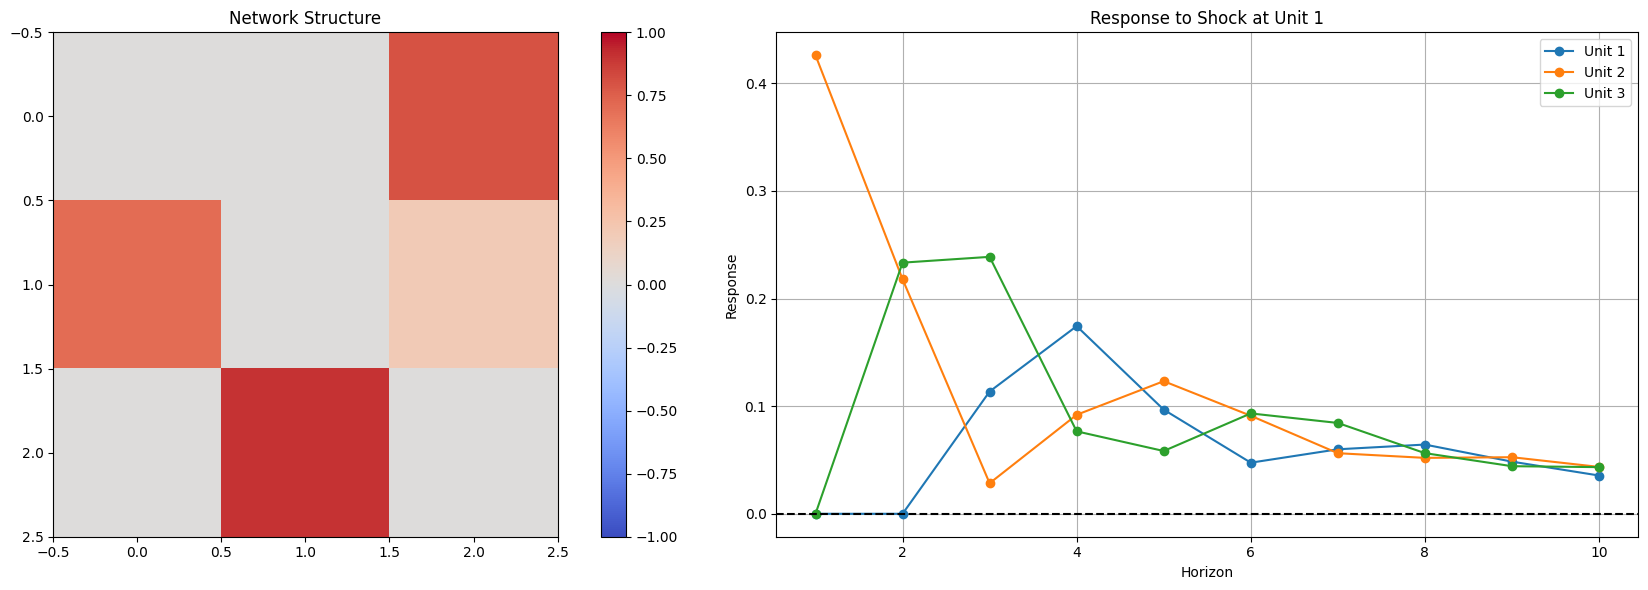

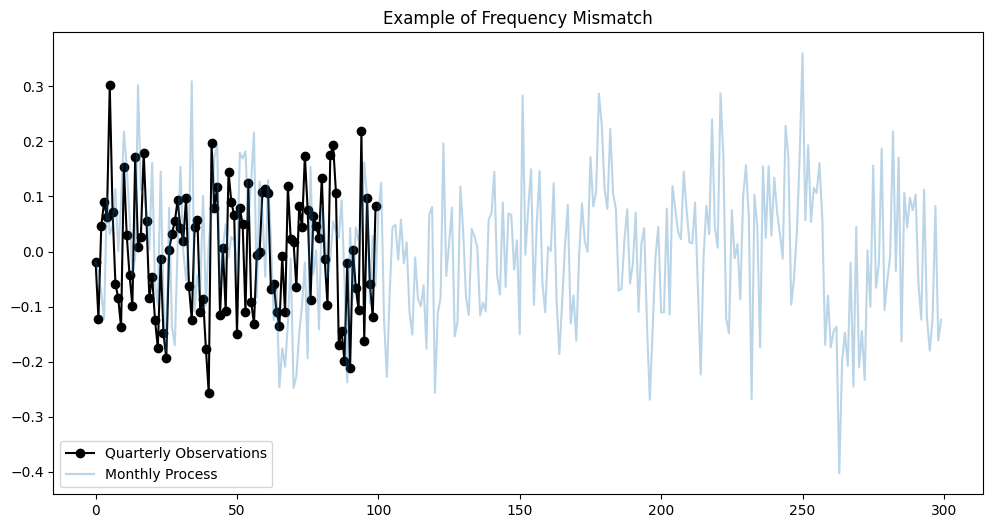

In [4]:
from math import ceil

# ============================================
# 1. SIMULASI NVAR(p,1) - DIPERBARUI SESUAI PERSAMAAN (2)
# ============================================

def simulate_nvar_p(A, alphas, T=1000, sigma_u=0.1, burn_in=500, seed=None):
    """
    Simulasi yang diperbaiki dengan burn-in lebih panjang dan inisialisasi stabil
    """
    np.random.seed(seed)
    p = len(alphas)
    n = A.shape[0]
    total_T = T + burn_in
    y = np.zeros((total_T, n))
    u = np.random.normal(0, sigma_u, (total_T, n))
    
    # Inisialisasi dengan proses stabil
    for t in range(1, p):
        y[t] = 0.5*y[t-1] + np.random.normal(0, 0.01, n)
    
    # Simulasi utama dengan kontrol stabilitas
    for t in range(p, total_T):
        y[t] = sum(alphas[l] * (A @ y[t-l-1]) for l in range(p)) + u[t]
        
        # Penyesuaian stabilitas
        if np.max(np.abs(y[t])) > 1e3:
            raise ValueError("Proses tidak stabil. Periksa parameter.")
    
    return y[burn_in:]

# ============================================
# 2. ESTIMASI PARAMETER DENGAN OLS - DIPERBARUI
# ============================================

def estimate_alphas(A, Y, p):
    """
    Estimasi parameter α untuk NVAR(p,1) dengan matriks desain yang benar
    
    Parameters:
        A (np.ndarray): Matriks adjacency (n x n)
        Y (np.ndarray): Data time series (T x n)
        p (int): Orde lag
        
    Returns:
        np.ndarray: Estimasi parameter [α1, ..., αp]
    """
    T, n = Y.shape
    num_obs = (T - p) * n  # Jumlah total observasi
    
    # Inisialisasi matriks desain dan target
    X = np.zeros((num_obs, p))
    y = Y[p:].ravel()  # Target dalam bentuk vektor
    
    # Bangun matriks desain
    for l in range(p):
        # Hitung AY untuk lag ke-l
        AY = (A @ Y[p-l-1:T-l-1].T).T  # Dimensi (T-p) x n
        
        # Assign ke kolom X dengan reshape yang benar
        X[:, l] = AY.ravel()  # Ravel untuk flatten menjadi vektor
    
    # Ridge regression untuk stabilitas numerik
    I = np.eye(p)
    alphas = np.linalg.lstsq(X.T @ X + 1e-6*I, X.T @ y, rcond=None)[0]
    
    return alphas

# ============================================
# 3. IMPULSE RESPONSE FUNCTION - SESUAI PERSAMAAN (3)
# ============================================

def compute_girf_p(A, alphas, h_max=20):
    """
    Menghitung Generalized Impulse Response Function (GIRF) untuk NVAR(p,1)
    yang sesuai dengan persamaan (3) dalam paper
    
    Parameters:
        A (np.ndarray): Matriks adjacency jaringan (n x n)
        alphas (list): Koefisien [α1, α2, ..., αp]
        h_max (int): Horizon maksimum respons
        
    Returns:
        list: List matriks GIRF untuk h=0 sampai h_max
    """
    p = len(alphas)
    n = A.shape[0]
    girf = [np.eye(n)]  # h=0 (matriks identitas)
    
    # Precompute semua pangkat matriks A yang diperlukan
    A_powers = [np.eye(n)]  # A^0
    for k in range(1, h_max+1):
        A_powers.append(A @ A_powers[-1])
    
    # Fungsi bantu untuk menghitung koefisien c_k^h(α)
    def compute_coeff(k, h):
        """
        Menghitung koefisien c_k^h(α) sesuai persamaan (3) dalam paper
        """
        if k > h:
            return 0.0
        
        # Kasus khusus untuk koneksi langsung (k=1)
        if k == 1 and h <= p:
            return alphas[h-1]
        
        # Hitung jumlah semua path yang valid dari 1 ke h dengan panjang k
        coeff = 0.0
        # Implementasi sederhana - bisa dioptimasi lebih lanjut
        # Ini adalah pendekatan rekursif untuk menghitung koefisien
        if k == 1:
            if h <= p:
                return alphas[h-1]
            else:
                return 0.0
        else:
            for m in range(1, min(p, h-k+1)+1):
                coeff += alphas[m-1] * compute_coeff(k-1, h-m)
        
        return coeff
    
    # Hitung GIRF untuk setiap horizon
    for h in range(1, h_max+1):
        current = np.zeros((n,n))
        k_min = ceil(h/p)  # Sesuai Proposition dalam paper
        
        for k in range(k_min, h+1):
            c = compute_coeff(k, h)
            current += c * A_powers[k]
        
        girf.append(current)
    
    return girf

# ============================================
# 4. FREKUENSI OBSERVASI vs INTERAKSI JARINGAN - DIPERBARUI
# ============================================

def simulate_frequency_mismatch(A, alphas, freq_ratio=3, T=100, seed=None):
    """
    Simulasi ketidaksesuaian frekuensi antara frekuensi jaringan dan frekuensi observasi
    
    Parameters:
        A (np.ndarray): Matriks adjacency jaringan (n x n)
        alphas (list): Koefisien [α1, α2, ..., αp]
        freq_ratio (int): Rasio frekuensi jaringan terhadap frekuensi observasi
        T (int): Jumlah observasi yang diinginkan
        seed (int): Seed untuk random generator
        
    Returns:
        tuple: (y_obs, y_high) dimana:
               y_obs: data agregasi frekuensi rendah (T x n)
               y_high: data frekuensi tinggi (T*freq_ratio x n)
    """
    np.random.seed(seed)
    n = A.shape[0]
    
    # Simulasi proses frekuensi tinggi (network interaction frequency)
    y_high = simulate_nvar_p(A, alphas, T*freq_ratio, burn_in=100)
    
    # Agregasi temporal (observational frequency)
    y_obs = np.zeros((T, n))
    for t in range(T):
        # Moving average untuk agregasi
        y_obs[t] = np.mean(y_high[t*freq_ratio:(t+1)*freq_ratio], axis=0)
    
    return y_obs, y_high

# ============================================
# 5. ANALISIS GRANGER-CAUSALITY - SESUAI PROPOSITION
# ============================================

def granger_causality_matrix(A, alphas, h):
    """
    Membuat matriks Granger-causality untuk horizon h sesuai Proposition
    """
    p = len(alphas)
    n = A.shape[0]
    k_min = ceil(h/p)
    
    # Hitung semua A^k untuk k_min ≤ k ≤ h
    gc_mat = np.zeros((n,n))
    for k in range(k_min, h+1):
        gc_mat += np.linalg.matrix_power(A, k)
    
    return (gc_mat != 0).astype(float)

# ============================================
# 6. VISUALISASI - DIPERBARUI DENGAN MULTI-HORIZON
# ============================================

def plot_granger_effects(A, girf, shock_unit=0, max_h=10):
    """
    Plot efek Granger-causality untuk berbagai horizon
    """
    n = A.shape[0]
    fig, ax = plt.subplots(1, 2, figsize=(18,6))
    
    # Panel kiri: Struktur jaringan
    im = ax[0].imshow(A, cmap='coolwarm', vmin=-1, vmax=1)
    plt.colorbar(im, ax=ax[0])
    ax[0].set_title('Network Structure')
    
    # Panel kanan: Respons multi-horizon
    horizons = range(1, max_h+1)
    for i in range(n):
        responses = [girf[h][i,shock_unit] for h in horizons]
        ax[1].plot(horizons, responses, marker='o', label=f'Unit {i+1}')
    
    ax[1].axhline(0, color='k', linestyle='--')
    ax[1].set_title(f'Response to Shock at Unit {shock_unit+1}')
    ax[1].set_xlabel('Horizon')
    ax[1].set_ylabel('Response')
    ax[1].legend()
    ax[1].grid(True)
    
    plt.tight_layout()
    plt.show()

# ============================================
# 7. DEMONSTRASI - DIPERBARUI DENGAN CONTOH PAPER
# ============================================

if __name__ == "__main__":
    # Contoh jaringan dan parameter
    A = np.array([
        [0.0, 0.0, 0.8],
        [0.7, 0.0, 0.2],
        [0.0, 0.9, 0.0]
    ])
    alphas = [0.6, 0.3]  # p=2
    
    # Simulasi data
    Y = simulate_nvar_p(A, alphas, T=1000, seed=42)
    
    # Estimasi parameter
    alphas_est = estimate_alphas(A, Y, p=2)
    print(f"Parameter estimated: {alphas_est} (True: {alphas})")
    
    # Hitung GIRF
    girf = compute_girf_p(A, alphas_est, h_max=10)
    
    # Visualisasi
    plot_granger_effects(A, girf, shock_unit=0)
    
    # Analisis frekuensi
    y_obs, y_high = simulate_frequency_mismatch(A, alphas, freq_ratio=3)
    
    # Plot hasil frekuensi
    plt.figure(figsize=(12,6))
    plt.plot(y_high[::3,0], 'ko-', label='Quarterly Observations')
    plt.plot(y_high[:,0], alpha=0.3, label='Monthly Process')
    plt.title('Example of Frequency Mismatch')
    plt.legend()
    plt.show()

### Time-Aggregation of Lagged Innovation Transmission: NVAR(p,q)

#### Stock Variables

Suppose $y_t$ is a stock variable and evolves as

$$
\tilde{y}_\tau = \alpha_1 A \tilde{y}_{\tau - 1} + \ldots + \alpha_p A \tilde{y}_{\tau - p} + \tilde{u}_\tau, \quad \tau = 1 : T_\tau, \tag{4}
$$

$$
y_{\tau/q} = \tilde{y}_\tau \quad \text{if} \; \tau/q \in \mathbb{N},
$$

for some $q \in \mathbb{Q}_{++}$ and $T_\tau$ s.t. $T = \left| \{(1 : T_\tau)/q\} \cap \mathbb{N} \right|$. The number of elements in the set $1 : T_{\tau}$ that are integer-multiples of $q$ shall equal $T$. This yields $T_{\tau} = qT$ under $q \in \mathbb{N}$, and $T_{\tau} = T$ under $q^{-1} \in \mathbb{N}$. For other $q \in \mathbb{Q}_{++}$, we have $T_{\tau} = q_2 T$, where $q_2$ is the least common multiple of $q$ and $1$. I dub this process NVAR(p,q). As Eq.~(2) and Eq.~(3) make clear, $\tau$ denotes a frequency at which innovation transmission occurs over a set of time intervals, all of which are of integer length. If transmission happens at regular intervals, $\tau$ is simply the frequency at which it takes one period of time for an innovation to transmit (partially) along a direct link from one cross-sectional unit to another. However, as the subsequent discussion shows, under Normality of $\tilde{u}_{\tau}$, $\tau$ is not unique, but one can write the process at an integer-multiple frequency of $\tau$ without changing its distributional properties.

Thereby, $q$ indicates the frequency of network interactions relative to the frequency of observation. If $q = 1$, the two coincide, and, trivially, $y_t$ and $\tilde{y}_\tau$ are the same NVAR(p,1) process. If $q \in \mathbb{N} \setminus \{1\}$, network interaction frequency is an integer-multiple of observational frequency, which means we observe a snapshot of $\tilde{y}_\tau$ every $q$ periods: $\{y_t\}_{t=1:T} = \{\tilde{y}_{tq}\}_{t=1:T}$. For example, $q = 4$ under monthly observations implies weekly network interactions.

For any NVAR(p,q) with $q \in \mathbb{Q}_{++}$, we can find an observationally equivalent (restricted) NVAR($p^*$,$q$) with $q = 1$ or $q \in \mathbb{N} \setminus \{1\}$. First, consider $q^{-1} \in \mathbb{N} \setminus \{1\}$, i.e. observational frequency is an integer-multiple of the network interaction frequency. For example, $q = 1/3$ under monthly observations implies quarterly network interactions. In this case, all $\tilde{y}_\tau$ are observed. Under Normality of $\tilde{u}_\tau$, $y_t$ follows an NVAR($p^*$,$1$), with $p^* = p/q \in \mathbb{N}$:

$$
y_t = \gamma_1 A y_{t-1} + \ldots + \gamma_{p^*} A y_{t-p^*} + u_t, \quad \gamma_l = \begin{cases} 
\alpha_{lq} & \text{if } l \text{ is multiple of } q^{-1}, \\
0 & \text{otherwise},
\end{cases}
$$

$$
u_t \sim \tilde{u}_\tau.
$$

Under distributional equivalence of $u_t$ and $\tilde{u}_{\tau}$, $\mathbb{E}[y_t y_{t-h}] = \mathbb{E}[\tilde{y}_{\tau} \tilde{y}_{\tau - hq}] \forall h$ for all $h$, and under Normality, the first two moments fully characterize the process. In the previous example, the observed, monthly series depends on its value three months ago, six months ago, etc., up to $3p$ months ago.

For any other $q \in \mathbb{Q}_{++}$, we can write $q = q_1 q_2$ with $q_1^{-1} \in \mathbb{N}$ and $q_2 \in \mathbb{N}$. Note that $q_2$ is the least common multiple of $q$ and $1$, whereas $q_1$ is their greatest common denominator. Consequently, we observe every $q_2$ periods a snapshot of an NVAR($p$/$q_1$,$1$) process: $\{y_t\}_{t=1:T} = \{\tilde{y}^*_{tq_2}\}_{t=1:T}$, where $\tilde{y}^*_{\tau^*} \sim \text{NVAR}(p/q_1,1)$. For example, under monthly observations, $q = 4/3$ implies that network interactions occur at tri-weekly frequency, and we observe every fourth period a snapshot of a weekly process that depends on its value three weeks ago, six weeks ago, etc. Analogously, network interactions occur every five weeks under $q = 4/5$ and every four days under $q = 30/4$.

The time-aggregation of lagged transmission patterns generalizes the mapping from network connectedness to observed dynamics. Intuitively, in an NVAR($p$,$q$), $q$ rounds of transmission can occur in one period of observation. As a result, connection-orders higher than $h$ can matter for transmission at horizon $h$. Furthermore, observed innovations $u_t = y_t - \mathbb{E}_{t-1}[y_t]$ can be cross-sectionally correlated even if the innovations at network interaction frequency, $\tilde{u}_\tau$, are not. This correlation is affected by connections of order $k \leq q - 1$. Intuitively, this is because $u_t$ is composed of $\{\tilde{y}_{tq}, \ldots, \tilde{y}_{tq - q + 1}\}$. As a result, $\text{Cov}(u_{it}, u_{jt})$ is affected by partial derivatives $\partial \tilde{y}_{k, \tau + h} / \partial \tilde{y}_{o, \tau}$ for $h = 1 : (q - 1)$ and all units $k, o = 1 : n$.

**Proposition (Granger-Causality in NVAR($p$,$q$))**:  
Let the stock variable $y_t$ follow an NVAR($p$,$q$) for $q \in \mathbb{N} \setminus \{1\}$ with $\alpha_l \neq 0$ for $l = 1 : p$. Then $\tilde{y}_j$ Granger-causes $\tilde{y}_i$ at horizon $h$ iff there exists a connection from $i$ to $j$ of at least one order $k \in \{\underline{k}, \underline{k}+1, \ldots, hq\}$, where $\underline{k} = \text{ceil}(hq/p)$.

#### Flow Variables

If $y_t$ is a flow variable, we can write $\{y_t\}^T_{t=1} = \{\tilde{y}_{tq} + \ldots + \tilde{y}_{tq - q + 1}\}^T_{t=1:T}$ provided that $q \in \mathbb{N}$, i.e. the network interaction frequency either coincides with the observational frequency ($q = 1$) or is an integer-multiple thereof. Analogous calculations apply if $y_t = (\tilde{y}_{\tau} + \ldots + \tilde{y}_{\tau - q + 1}) / q$. Dynamics of $y_t$ are represented by the state space system

$$
\tilde{y}_\tau = \alpha_1 A \tilde{y}_{\tau - 1} + \ldots + \alpha_p A \tilde{y}_{\tau - p} + \tilde{u}_\tau, \quad \tau = 1 : T_\tau, \tag{5}
$$

$$
y_{\tau/q} = \tilde{y}_\tau + \ldots + \tilde{y}_{\tau - q + 1} \quad \text{if} \; \tau/q \in \mathbb{N}.
$$

As shown in Appendix A, analogous conclusions about the dynamics of $y_t$ can be drawn as in the case of stock variables. For $q \notin \mathbb{N}$, no state space representation can be found for $y_t$ (without assumptions that allow us to convert a flow variable from lower to higher frequency).

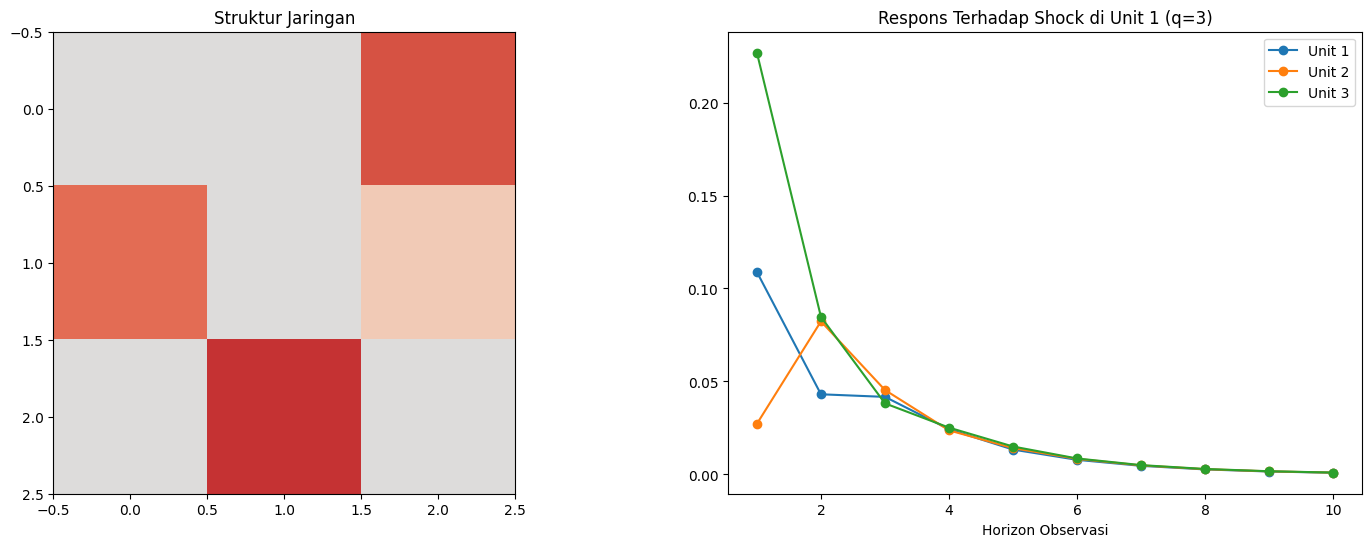

Matriks Granger-causality untuk h=2 observasi (q=3):
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil

# ============================================
# 1. SIMULASI NVAR(p,q) - DIPERBARUI UNTUK STOCK/FLOW DAN FREKUENSI q
# ============================================
def simulate_nvar_p(A, alphas, T=1000, sigma_u=0.1, burn_in=500, seed=None):
    """
    Simulasi yang diperbaiki dengan burn-in lebih panjang dan inisialisasi stabil
    """
    np.random.seed(seed)
    p = len(alphas)
    n = A.shape[0]
    total_T = T + burn_in
    y = np.zeros((total_T, n))
    u = np.random.normal(0, sigma_u, (total_T, n))
    
    # Inisialisasi dengan proses stabil
    for t in range(1, p):
        y[t] = 0.5*y[t-1] + np.random.normal(0, 0.01, n)
    
    # Simulasi utama dengan kontrol stabilitas
    for t in range(p, total_T):
        y[t] = sum(alphas[l] * (A @ y[t-l-1]) for l in range(p)) + u[t]
        
        # Penyesuaian stabilitas
        if np.max(np.abs(y[t])) > 1e3:
            raise ValueError("Proses tidak stabil. Periksa parameter.")
    
    return y[burn_in:]


def simulate_nvar_pq(A, alphas, q=1, T=1000, variable_type='stock', sigma_u=0.1, burn_in=500, seed=None):
    """
    Simulasi NVAR(p,q) dengan frekuensi jaringan q kali frekuensi observasi
    
    Parameters:
        A (np.ndarray): Matriks adjacency (n x n)
        alphas (list): Koefisien [α1, ..., αp]
        q (int): Rasio frekuensi jaringan terhadap observasi (harus integer)
        T (int): Jumlah observasi yang diinginkan
        variable_type (str): 'stock' (stok) atau 'flow' (aliran)
        sigma_u (float): Standar deviasi inovasi
        burn_in (int): Burn-in periode untuk proses frekuensi tinggi
        seed (int): Seed untuk random generator
        
    Returns:
        np.ndarray: Data observasi (T x n)
    """
    np.random.seed(seed)
    n = A.shape[0]
    T_high_total = q * T + burn_in
    
    # Simulasi proses frekuensi tinggi (NVAR(p,1))
    tilde_y = simulate_nvar_p(A, alphas, T=T_high_total, sigma_u=sigma_u, burn_in=0, seed=seed)
    
    # Pembakaran data frekuensi tinggi
    tilde_y_burned = tilde_y[burn_in:]
    
    # Potong data sesuai kebutuhan
    if len(tilde_y_burned) < q*T:
        raise ValueError("Data frekuensi tinggi tidak cukup setelah burn-in")
    tilde_y_trimmed = tilde_y_burned[:q*T]
    
    # Agregasi berdasarkan tipe variabel
    if variable_type == 'stock':
        y_obs = tilde_y_trimmed[::q]  # Ambil setiap q periode
    elif variable_type == 'flow':
        y_obs = np.zeros((T, n))
        for t in range(T):
            blok = tilde_y_trimmed[t*q:(t+1)*q]
            y_obs[t] = np.mean(blok, axis=0)  # Rata-rata blok
    else:
        raise ValueError("Tipe variabel harus 'stock' atau 'flow'")
    
    return y_obs

# ============================================
# 2. MODIFIKASI GRANGER-CAUSALITY UNTUK q
# ============================================

def granger_causality_matrix_q(A, alphas, h, q=1):
    """
    Matriks Granger-causality untuk NVAR(p,q) sesuai Proposition
    
    Parameters:
        A (np.ndarray): Matriks adjacency
        alphas (list): Koefisien [α1, ..., αp]
        h (int): Horizon observasi
        q (int): Rasio frekuensi jaringan
        
    Returns:
        np.ndarray: Matriks biner Granger-causality
    """
    p = len(alphas)
    n = A.shape[0]
    h_total = h * q  # Konversi ke horizon frekuensi tinggi
    k_min = ceil(h_total / p)
    k_max = h_total
    
    # Hitung semua A^k yang diperlukan
    A_powers = [np.eye(n)]
    for k in range(1, k_max+1):
        A_powers.append(A @ A_powers[-1])
    
    # Jumlahkan dari k_min ke k_max
    gc_mat = np.zeros((n,n))
    for k in range(k_min, k_max+1):
        gc_mat += A_powers[k]
    
    return (gc_mat != 0).astype(float)

# ============================================
# 3. GIRF UNTUK FREKUENSI OBSERVASI DENGAN q
# ============================================
def compute_girf_p(A, alphas, h_max=20):
    """
    Menghitung Generalized Impulse Response Function (GIRF) untuk NVAR(p,1)
    yang sesuai dengan persamaan (3) dalam paper
    
    Parameters:
        A (np.ndarray): Matriks adjacency jaringan (n x n)
        alphas (list): Koefisien [α1, α2, ..., αp]
        h_max (int): Horizon maksimum respons
        
    Returns:
        list: List matriks GIRF untuk h=0 sampai h_max
    """
    p = len(alphas)
    n = A.shape[0]
    girf = [np.eye(n)]  # h=0 (matriks identitas)
    
    # Precompute semua pangkat matriks A yang diperlukan
    A_powers = [np.eye(n)]  # A^0
    for k in range(1, h_max+1):
        A_powers.append(A @ A_powers[-1])
    
    # Fungsi bantu untuk menghitung koefisien c_k^h(α)
    def compute_coeff(k, h):
        """
        Menghitung koefisien c_k^h(α) sesuai persamaan (3) dalam paper
        """
        if k > h:
            return 0.0
        
        # Kasus khusus untuk koneksi langsung (k=1)
        if k == 1 and h <= p:
            return alphas[h-1]
        
        # Hitung jumlah semua path yang valid dari 1 ke h dengan panjang k
        coeff = 0.0
        # Implementasi sederhana - bisa dioptimasi lebih lanjut
        # Ini adalah pendekatan rekursif untuk menghitung koefisien
        if k == 1:
            if h <= p:
                return alphas[h-1]
            else:
                return 0.0
        else:
            for m in range(1, min(p, h-k+1)+1):
                coeff += alphas[m-1] * compute_coeff(k-1, h-m)
        
        return coeff
    
    # Hitung GIRF untuk setiap horizon
    for h in range(1, h_max+1):
        current = np.zeros((n,n))
        k_min = ceil(h/p)  # Sesuai Proposition dalam paper
        
        for k in range(k_min, h+1):
            c = compute_coeff(k, h)
            current += c * A_powers[k]
        
        girf.append(current)
    
    return girf


def compute_girf_pq(A, alphas, q=1, h_max=20):
    """
    Menghitung GIRF untuk proses observasi NVAR(p,q)
    
    Parameters:
        A (np.ndarray): Matriks adjacency
        alphas (list): Koefisien [α1, ..., αp]
        q (int): Rasio frekuensi jaringan
        h_max (int): Horizon maksimum observasi
        
    Returns:
        list: List matriks GIRF untuk h=0 sampai h_max
    """
    # Hitung GIRF frekuensi tinggi hingga h_max*q
    girf_high = compute_girf_p(A, alphas, h_max=q*h_max)
    
    # Ambil GIRF pada horizon observasi
    girf_obs = [girf_high[h*q] for h in range(h_max+1)]
    
    return girf_obs

# ============================================
# 4. CONTOH PENGGUNAAN
# ============================================

if __name__ == "__main__":
    # Contoh jaringan dan parameter
    A = np.array([
        [0.0, 0.0, 0.8],
        [0.7, 0.0, 0.2],
        [0.0, 0.9, 0.0]
    ])
    alphas = [0.6, 0.3]  # p=2
    q = 3  # Frekuensi jaringan 3x lebih tinggi
    
    # Simulasi data stok
    Y_stock = simulate_nvar_pq(A, alphas, q=q, T=1000, 
                              variable_type='stock', seed=42)
    
    # Simulasi data aliran
    Y_flow = simulate_nvar_pq(A, alphas, q=q, T=1000,
                             variable_type='flow', seed=42)
    
    # Hitung GIRF untuk observasi
    girf_stock = compute_girf_pq(A, alphas, q=q, h_max=10)
    
    # Visualisasi
    def plot_granger_effects_q(A, girf, q, shock_unit=0, max_h=10):
        n = A.shape[0]
        fig, ax = plt.subplots(1, 2, figsize=(18,6))
        
        # Panel kiri: Struktur jaringan
        ax[0].imshow(A, cmap='coolwarm', vmin=-1, vmax=1)
        ax[0].set_title('Struktur Jaringan')
        
        # Panel kanan: Respons multi-horizon
        horizons = range(1, max_h+1)
        for i in range(n):
            responses = [girf[h][i,shock_unit] for h in horizons]
            ax[1].plot(horizons, responses, 'o-', label=f'Unit {i+1}')
        
        ax[1].set_title(f'Respons Terhadap Shock di Unit {shock_unit+1} (q={q})')
        ax[1].set_xlabel('Horizon Observasi')
        ax[1].legend()
        plt.show()
    
    plot_granger_effects_q(A, girf_stock, q=q, shock_unit=0)
    
    # Contoh Granger-causality untuk q=3
    h_obs = 2
    gc_mat = granger_causality_matrix_q(A, alphas, h=h_obs, q=q)
    print(f"Matriks Granger-causality untuk h={h_obs} observasi (q={q}):")
    print(gc_mat)

### Relation to Contemporaneous Innovation Transmission

The econometric literature on Spatial Autoregressive (SAR) models and the macroeconomic literature on production networks typically assume contemporaneous network interactions. In that case, the implicit assumption is that connections of all order materialize in any given period of observation:

$$
x = Ax + \varepsilon = (I - A)^{-1} \varepsilon = (A + A^2 + A^3 + \ldots) \varepsilon.
$$

The cross-sectional comovement among $\{x_i\}_{i=1}^n$ is rationalized by the contemporaneous transmission of cross-sectionally uncorrelated, idiosyncratic shocks $\{\varepsilon_i\}_{i=1}^n$ along bilateral links. 

Contemporaneous interactions are silent on how networks drive dynamics. At least in absence of further structure, such as provided by a dynamic macroeconomic model with intertemporally linked optimization problems of agents who are impacted by disturbances to $x$. Even in that case, contemporaneous network interactions can only amplify dynamics but not cause them. Nevertheless, models with contemporaneous and lagged network interactions are related: the (contemporaneous) response of $x_i$ to a (transitory or persistent) innovation to $x_j$ under contemporaneous interactions is equal to the long-run response of $y_{it}$ to a persistent innovation to $y_{jt}$ under lagged interactions, provided that $y_t$ is stationary.

---

**Proposition (NVAR($p$,$1$): Long-Term Response to White Noise-Innovations)**  
Let $y_t = \alpha_1 A y_{t-1} + \ldots + \alpha_p A y_{t-p} + u_t$ and $x = a A x + \varepsilon$ with $a = \sum_{l=1}^{p} \alpha_l$, and assume $y_t$ is weakly stationary. Then

$$
\lim_{h \to \infty} \left( \frac{\partial y_{t+h}}{\partial u_t} + \frac{\partial y_{t+h}}{\partial u_{t+1}} + \ldots + \frac{\partial y_{t+h}}{\partial u_{t+h}} \right) = \frac{\partial x}{\partial \varepsilon} = (I - aA)^{-1}.
$$

Both responses are given by element $(i, j)$ of the Leontief inverse $(I - aA)^{-1}$, which is a sufficient statistic for the long-term (or static) cross-sectional comovement. By taking a stance on the time profile of network interactions, $y_t$ shows how any such long-term effect materializes over time, i.e. it goes beyond steady state comparisons and characterizes transition dynamics. This result carries over to an NVAR($p$,$q$), $q \in \mathbb{N} \setminus \{1\}$ i.e., the long-term response of $y_t$ to a permanent increase in the underlying high-frequency innovation $\tilde{u}_{\tau}$ equals $(I - \alpha A)^{-1}$ (see Appendix A.1). Note that there is a one-to-one mapping between the timing of responses to permanent and temporary shocks, with slowly accumulating long-term responses to permanent shocks implying persistent responses to temporary shocks. For any VAR, the long-term response to a permanent shock is equal to the cumulative responses to temporary shocks. Therefore, the (fraction of the) long-term response which materialized until horizon $h$ is equal to the area under the IRF to a temporary shock until horizon $h$ (as a fraction of the total area).

---

**Stationarity of NVAR($p$,$1$)**  
Stationarity of the NVAR($p$,$1$) can be characterized in terms of eigenvalues of the network adjacency matrix $A$ and the time profile of network effects $\alpha$, which drastically simplifies checking for stationarity under high dimensions. Expectedly, stationarity of an NVAR($p$,$q$) is implied by stationarity of the underlying NVAR($p$,$1$) (see Proposition 10).

**Proposition (Stationarity of NVAR($p$,$1$))**  
Let $y_t = \alpha_1 A y_{t-1} + \ldots + \alpha_p A y_{t-p} + u_t$ with $u_t \sim WN$, assume $\alpha_l \neq 0$ for at least one $l$, and define $a = \sum_{l=1}^{p} |\alpha_l|$.

Then, $y_t$ is weakly stationary (WS) iff for all eigenvalues $\lambda_i$ of $A$, the matrix

$$
\begin{bmatrix} 
\alpha_1 \lambda_i & \ldots & \alpha_p \lambda_i \\ 
I_{p-1} & & 0 
\end{bmatrix}
$$

has all eigenvalues inside the unit circle. For real $\lambda_i$, this is equivalent to $WS$ of the univariate $AR(p)$ process $x_t = \lambda_i \alpha_1 x_{t-1} + \ldots + \lambda_i \alpha_p x_{t-p} + v_t$.

Moreover, a sufficient condition for $WS$ of $y_t$ is that $|\lambda_i| < 1/a$ for all eigenvalues $\lambda_i$ of $A$. Under $\alpha_l \geq 0 \; \forall \; l$, this condition is both necessary and sufficient.

Parameter estimated: [0.60856594 0.31131502]


/var/folders/89/g36qmjkd2_34hr9ypwvhrzkc0000gn/T/ipykernel_1671/286456648.py:271: ComplexWarning: Casting complex values to real discards the imaginary part
  C[0,:] = [lam * alpha for alpha in alphas]


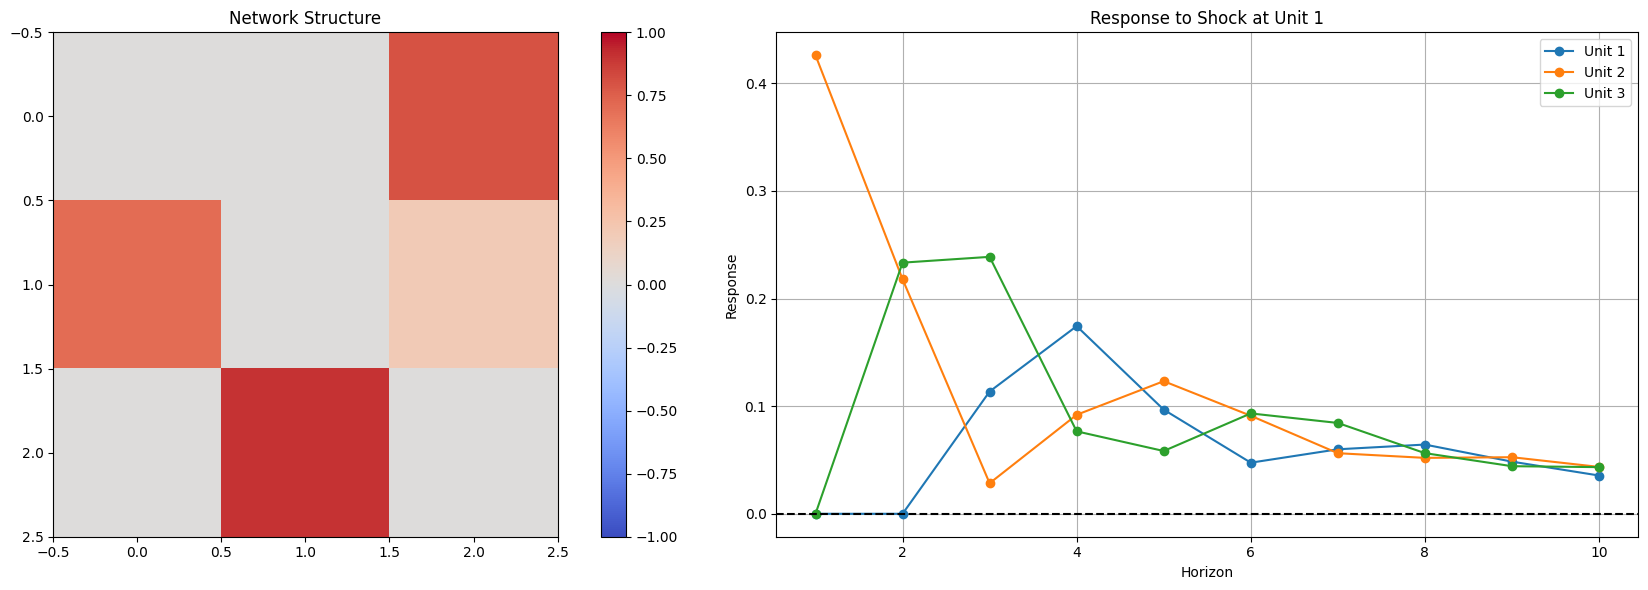

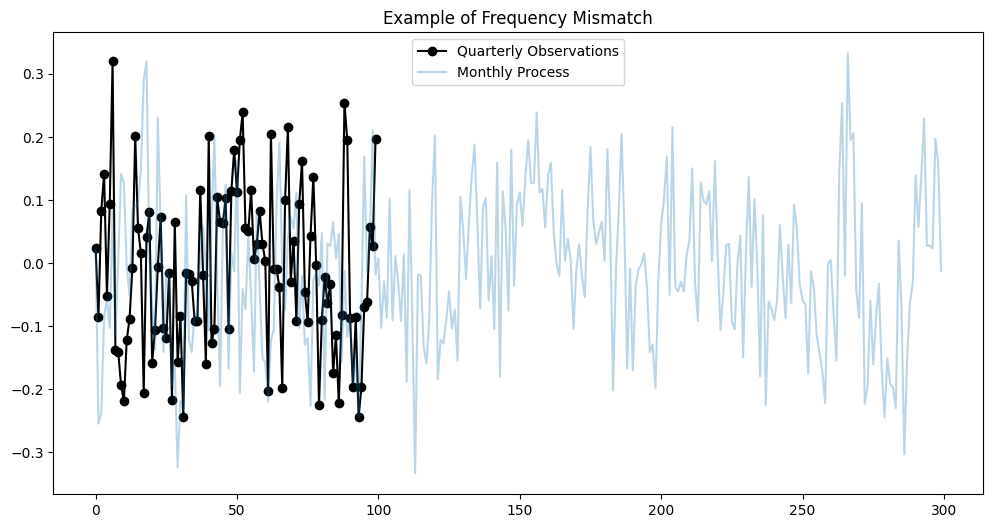


=== Additional Analysis Based on New Proposition ===
Stationarity: Yes
Max eigenvalue of companion matrix: 0.8493
Sufficient condition: Satisfied

Comparison of Cumulative Response vs Leontief Inverse:
Cumulative response (h=20):
 [[1.82 1.28 1.56]
 [1.37 2.14 1.39]
 [1.12 1.76 2.14]]

Leontief inverse:
 [[1.86 1.34 1.62]
 [1.41 2.2  1.44]
 [1.17 1.82 2.2 ]]


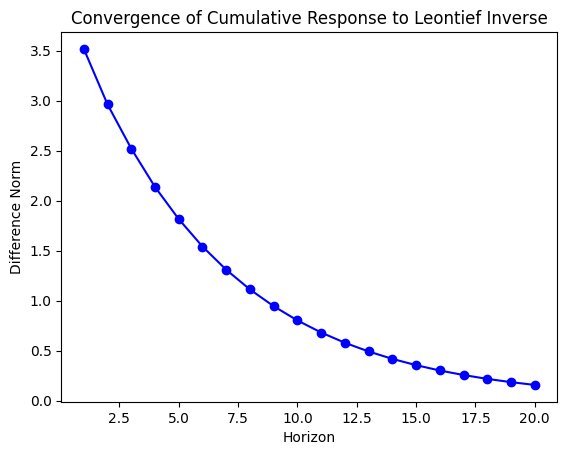

In [3]:
## NVAR(p,1) ##

import numpy as np
import matplotlib.pyplot as plt
from math import ceil

# ============================================
# 1. SIMULASI NVAR(p,1) - DIPERBARUI
# ============================================

def simulate_nvar_p(A, alphas, T=1000, sigma_u=0.1, burn_in=500, seed=None):
    """
    Simulasi yang diperbaiki dengan burn-in lebih panjang dan inisialisasi stabil
    """
    
    """Versi diperbarui dengan pengecekan stasionaritas awal"""
    np.random.seed(seed)
    p = len(alphas)
    n = A.shape[0]
    
    # Pengecekan stasionaritas awal
    is_stationary, max_eig, _ = check_stationarity(A, alphas)
    if not is_stationary:
        raise ValueError(f"System not stationary: max eigenvalue = {max_eig:.2f}")
    
    total_T = T + burn_in
    y = np.zeros((total_T, n))
    u = np.random.normal(0, sigma_u, (total_T, n))
    
    # Inisialisasi dengan proses stabil
    for t in range(1, p):
        y[t] = 0.5*y[t-1] + np.random.normal(0, 0.01, n)
    
    # Simulasi utama dengan kontrol stabilitas
    for t in range(p, total_T):
        y[t] = sum(alphas[l] * (A @ y[t-l-1]) for l in range(p)) + u[t]
        
        # Penyesuaian stabilitas
        if np.max(np.abs(y[t])) > 1e3:
            raise ValueError("Proses tidak stabil. Periksa parameter.")
    
    return y[burn_in:]

# ============================================
# 2. ESTIMASI PARAMETER DENGAN OLS - DIPERBARUI
# ============================================

def estimate_alphas(A, Y, p):
    """
    Estimasi parameter α untuk NVAR(p,1) dengan matriks desain yang benar
    
    Parameters:
        A (np.ndarray): Matriks adjacency (n x n)
        Y (np.ndarray): Data time series (T x n)
        p (int): Orde lag
        
    Returns:
        np.ndarray: Estimasi parameter [α1, ..., αp]
    """
    T, n = Y.shape
    num_obs = (T - p) * n  # Jumlah total observasi
    
    # Inisialisasi matriks desain dan target
    X = np.zeros((num_obs, p))
    y = Y[p:].ravel()  # Target dalam bentuk vektor
    
    # Bangun matriks desain
    for l in range(p):
        # Hitung AY untuk lag ke-l
        AY = (A @ Y[p-l-1:T-l-1].T).T  # Dimensi (T-p) x n
        
        # Assign ke kolom X dengan reshape yang benar
        X[:, l] = AY.ravel()  # Ravel untuk flatten menjadi vektor
    
    # Ridge regression untuk stabilitas numerik
    I = np.eye(p)
    alphas = np.linalg.lstsq(X.T @ X + 1e-6*I, X.T @ y, rcond=None)[0]
    
    return alphas

# ============================================
# 3. IMPULSE RESPONSE FUNCTION - SESUAI PERSAMAAN (3)
# ============================================

def compute_girf_p(A, alphas, h_max=20):
    """
    Menghitung Generalized Impulse Response Function (GIRF) untuk NVAR(p,1)
    yang sesuai dengan persamaan (3) dalam paper
    
    Parameters:
        A (np.ndarray): Matriks adjacency jaringan (n x n)
        alphas (list): Koefisien [α1, α2, ..., αp]
        h_max (int): Horizon maksimum respons
        
    Returns:
        list: List matriks GIRF untuk h=0 sampai h_max
    """
    p = len(alphas)
    n = A.shape[0]
    girf = [np.eye(n)]  # h=0 (matriks identitas)
    
    # Precompute semua pangkat matriks A yang diperlukan
    A_powers = [np.eye(n)]  # A^0
    for k in range(1, h_max+1):
        A_powers.append(A @ A_powers[-1])
    
    # Fungsi bantu untuk menghitung koefisien c_k^h(α)
    def compute_coeff(k, h):
        """
        Menghitung koefisien c_k^h(α) sesuai persamaan (3) dalam paper
        """
        if k > h:
            return 0.0
        
        # Kasus khusus untuk koneksi langsung (k=1)
        if k == 1 and h <= p:
            return alphas[h-1]
        
        # Hitung jumlah semua path yang valid dari 1 ke h dengan panjang k
        coeff = 0.0
        # Implementasi sederhana - bisa dioptimasi lebih lanjut
        # Ini adalah pendekatan rekursif untuk menghitung koefisien
        if k == 1:
            if h <= p:
                return alphas[h-1]
            else:
                return 0.0
        else:
            for m in range(1, min(p, h-k+1)+1):
                coeff += alphas[m-1] * compute_coeff(k-1, h-m)
        
        return coeff
    
    # Hitung GIRF untuk setiap horizon
    for h in range(1, h_max+1):
        current = np.zeros((n,n))
        k_min = ceil(h/p)  # Sesuai Proposition dalam paper
        
        for k in range(k_min, h+1):
            c = compute_coeff(k, h)
            current += c * A_powers[k]
        
        girf.append(current)
    
    return girf

# ============================================
# 4. FREKUENSI OBSERVASI vs INTERAKSI JARINGAN - DIPERBARUI
# ============================================

def simulate_frequency_mismatch(A, alphas, freq_ratio=3, T=100, seed=None):
    """
    Simulasi ketidaksesuaian frekuensi antara frekuensi jaringan dan frekuensi observasi
    
    Parameters:
        A (np.ndarray): Matriks adjacency jaringan (n x n)
        alphas (list): Koefisien [α1, α2, ..., αp]
        freq_ratio (int): Rasio frekuensi jaringan terhadap frekuensi observasi
        T (int): Jumlah observasi yang diinginkan
        seed (int): Seed untuk random generator
        
    Returns:
        tuple: (y_obs, y_high) dimana:
               y_obs: data agregasi frekuensi rendah (T x n)
               y_high: data frekuensi tinggi (T*freq_ratio x n)
    """
    np.random.seed(seed)
    n = A.shape[0]
    
    # Simulasi proses frekuensi tinggi (network interaction frequency)
    y_high = simulate_nvar_p(A, alphas, T*freq_ratio, burn_in=100)
    
    # Agregasi temporal (observational frequency)
    y_obs = np.zeros((T, n))
    for t in range(T):
        # Moving average untuk agregasi
        y_obs[t] = np.mean(y_high[t*freq_ratio:(t+1)*freq_ratio], axis=0)
    
    return y_obs, y_high

# ============================================
# 5. ANALISIS GRANGER-CAUSALITY - SESUAI PROPOSITION
# ============================================

def granger_causality_matrix(A, alphas, h):
    """
    Membuat matriks Granger-causality untuk horizon h sesuai Proposition
    """
    p = len(alphas)
    n = A.shape[0]
    k_min = ceil(h/p)
    
    # Hitung semua A^k untuk k_min ≤ k ≤ h
    gc_mat = np.zeros((n,n))
    for k in range(k_min, h+1):
        gc_mat += np.linalg.matrix_power(A, k)
    
    return (gc_mat != 0).astype(float)

# ============================================
# 6. VISUALISASI - DIPERBARUI DENGAN MULTI-HORIZON
# ============================================

def plot_granger_effects(A, girf, shock_unit=0, max_h=10):
    """
    Plot efek Granger-causality untuk berbagai horizon
    """
    n = A.shape[0]
    fig, ax = plt.subplots(1, 2, figsize=(18,6))
    
    # Panel kiri: Struktur jaringan
    im = ax[0].imshow(A, cmap='coolwarm', vmin=-1, vmax=1)
    plt.colorbar(im, ax=ax[0])
    ax[0].set_title('Network Structure')
    
    # Panel kanan: Respons multi-horizon
    horizons = range(1, max_h+1)
    for i in range(n):
        responses = [girf[h][i,shock_unit] for h in horizons]
        ax[1].plot(horizons, responses, marker='o', label=f'Unit {i+1}')
    
    ax[1].axhline(0, color='k', linestyle='--')
    ax[1].set_title(f'Response to Shock at Unit {shock_unit+1}')
    ax[1].set_xlabel('Horizon')
    ax[1].set_ylabel('Response')
    ax[1].legend()
    ax[1].grid(True)
    
    plt.tight_layout()
    plt.show()

# ============================================
# 7. LONG-TERM RESPONSE ANALYSIS - BARU
# ============================================

def compute_leontief_inverse(A, alphas):
    """Menghitung matriks Leontief inverse (I - aA)^(-1) di mana a = sum(alphas)"""
    a = np.sum(alphas)
    n = A.shape[0]
    return np.linalg.inv(np.eye(n) - a * A)

def compute_cumulative_girf(girf_list, h_max):
    """Menghitung respons kumulatif sampai horizon h_max"""
    cumulative = np.zeros_like(girf_list[0])
    for h in range(h_max+1):
        cumulative += girf_list[h]
    return cumulative

# ============================================
# 8. STATIONARITY CHECK - BARU
# ============================================

def check_stationarity(A, alphas):
    """
    Memeriksa stasionaritas NVAR(p,1) berdasarkan kriteria eigenvalue
    Mengembalikan tuple (is_stationary, max_eig, sufficient_condition)
    """
    n = A.shape[0]
    p = len(alphas)
    a = np.sum(np.abs(alphas))
    
    # Cek kondisi cukup
    eig_A = np.linalg.eigvals(A)
    sufficient = np.max(np.abs(eig_A)) * a < 1
    
    # Cek kondisi perlu dengan companion matrix
    companion_eigs = []
    for lam in eig_A:
        # Bangun companion matrix untuk setiap eigenvalue A
        C = np.zeros((p, p))
        C[0,:] = [lam * alpha for alpha in alphas]
        if p > 1:
            C[1:,:-1] = np.eye(p-1)
        companion_eigs.extend(np.linalg.eigvals(C))
    
    max_eig = np.max(np.abs(companion_eigs))
    necessary_sufficient = max_eig < 1
    
    return (necessary_sufficient, max_eig, sufficient)

# ============================================
# 9. DEMONSTRASI - DIPERBARUI
# ============================================

if __name__ == "__main__":
    # Contoh jaringan dan parameter
    A = np.array([
        [0.0, 0.0, 0.8],
        [0.7, 0.0, 0.2],
        [0.0, 0.9, 0.0]
    ])
    alphas = [0.6, 0.3]  # p=2
    
    # Simulasi data
    Y = simulate_nvar_p(A, alphas, T=1000, seed=42)
    
    # Estimasi parameter
    alphas_est = estimate_alphas(A, Y, p=2)
    print(f"Parameter estimated: {alphas_est}")
    
    # Hitung GIRF
    girf = compute_girf_p(A, alphas_est, h_max=10)
    
    # Visualisasi
    plot_granger_effects(A, girf, shock_unit=0)
    
    # Analisis frekuensi
    y_obs, y_high = simulate_frequency_mismatch(A, alphas, freq_ratio=3)
    
    # Plot hasil frekuensi
    plt.figure(figsize=(12,6))
    plt.plot(y_high[::3,0], 'ko-', label='Quarterly Observations')
    plt.plot(y_high[:,0], alpha=0.3, label='Monthly Process')
    plt.title('Example of Frequency Mismatch')
    plt.legend()
    plt.show()
    
    # Additional analysis
    print("\n=== Additional Analysis Based on New Proposition ===")
    
    # 1. Check stationarity
    is_stationary, max_eig, sufficient = check_stationarity(A, alphas_est)
    print(f"Stationarity: {'Yes' if is_stationary else 'No'}")
    print(f"Max eigenvalue of companion matrix: {max_eig:.4f}")
    print(f"Sufficient condition: {'Satisfied' if sufficient else 'Not satisfied'}")
    
    # 2. Compare cumulative response with Leontief inverse
    h_max = 20
    girf_long = compute_girf_p(A, alphas_est, h_max=h_max)
    cumulative_response = compute_cumulative_girf(girf_long, h_max)
    leontief = compute_leontief_inverse(A, alphas_est)
    
    print("\nComparison of Cumulative Response vs Leontief Inverse:")
    print("Cumulative response (h=20):\n", np.round(cumulative_response, 2))
    print("\nLeontief inverse:\n", np.round(leontief, 2))
    
    # 3. Visualization of convergence
    h_range = np.arange(1, h_max+1)
    diff_norm = [np.linalg.norm(compute_cumulative_girf(girf_long,h)-leontief) 
                for h in h_range]
    
    plt.figure()
    plt.plot(h_range, diff_norm, 'bo-')
    plt.xlabel('Horizon')
    plt.ylabel('Difference Norm')
    plt.title('Convergence of Cumulative Response to Leontief Inverse')
    plt.show()
    

Alphas : Parameter estimated: [0.15043122 0.01246421]  Parameter True: [0.6, 0.3]

Starting GIRF(p,q) calculation with q=2
Network dimension: 3x3, p=2, h_max=100

Calculating high-frequency GIRF up to horizon 202:

Memulai perhitungan GIRF(p,1):
Dimensi jaringan: 3x3, p=2, h_max=202

Menghitung matriks A^k:


Matrix Powers: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 745818.14power/s]



Menghitung respons impuls:


GIRF Calculation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 24517.45horizon/s]



Perhitungan GIRF(p,1) selesai!

Converting to observation frequency (q=2):


Observation Frequency: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 101/101 [00:00<00:00, 3779.12horizon/s, horizon=100]


Perhitungan GIRF(p,q) berhasil diselesaikan!


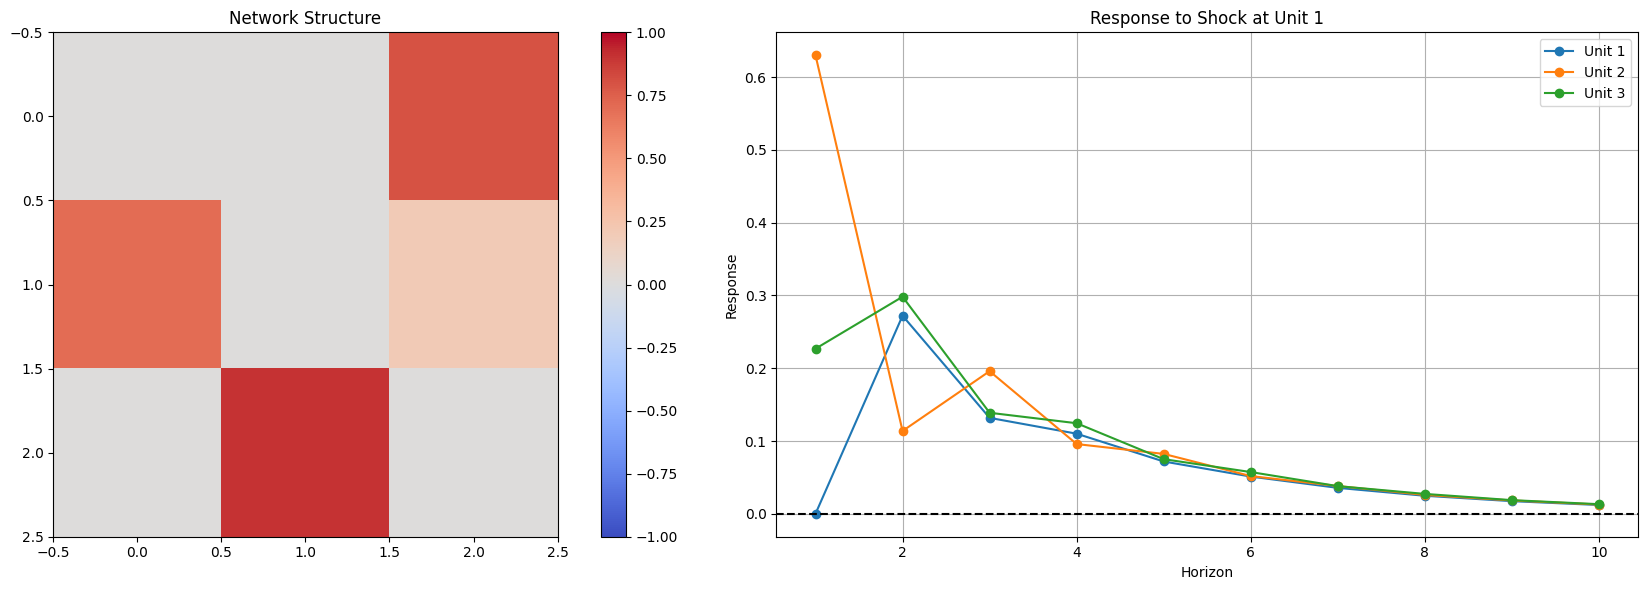

Stationarity: Yes
Max eigenvalue of companion matrix: 0.8354
Sufficient condition: Met

Theoretical long-run response:
[[1.75478241 1.19806732 1.47909545]
 [1.29420852 2.05429924 1.301604  ]
 [1.0483089  1.66398238 2.05429924]]

Cumulative GIRF response up to h=100:
[[1.75478241 1.19806732 1.47909545]
 [1.29420852 2.05429924 1.301604  ]
 [1.0483089  1.66398238 2.05429924]]


/var/folders/89/g36qmjkd2_34hr9ypwvhrzkc0000gn/T/ipykernel_1671/1031561653.py:446: ComplexWarning: Casting complex values to real discards the imaginary part
  C[0,:] = [lam * alpha for alpha in alphas]


In [6]:
## NVAR(p,q) ##

import numpy as np
import matplotlib.pyplot as plt
from math import ceil
from tqdm import tqdm 
from numba import njit
from fractions import Fraction


# ============================================
# 1. SIMULASI NVAR(p,q) - DIPERBARUI DENGAN CEK STASIONARITAS
# ============================================
def is_stationary(A, alphas):
    """
    Memeriksa stasionaritas NVAR(p,1) berdasarkan kriteria eigenvalue dari Proposisi.
    
    Parameters:
        A (np.ndarray): Matriks adjacency jaringan (n x n)
        alphas (list): Koefisien [α1, α2, ..., αp]
        
    Returns:
        bool: True jika model stasioner, False jika tidak
    """
    alphas = np.array(alphas)
    p = len(alphas)
    n = A.shape[0]
    a = np.sum(np.abs(alphas))
    
    # Cek jika semua alpha nol (model trivial stasioner)
    if a == 0:
        return True
    
    # Hitung eigenvalue dari A
    eig_A = np.linalg.eigvals(A)
    
    # Cek kondisi cukup: |λ_i| < 1/a untuk semua eigenvalue λ_i dari A
    if all(np.abs(eig_A) < 1 / a):
        return True
    
    # Jika alpha non-negatif, kondisi cukup menjadi perlu dan cukup
    if np.all(alphas >= 0):
        return False
    
    # Cek eigenvalue matriks companion untuk setiap λ_i
    for lambda_i in eig_A:
        # Bentuk matriks companion untuk AR(p) dengan koefisien lambda_i * alphas
        companion = np.zeros((p, p))
        companion[0, :] = lambda_i * alphas
        for i in range(1, p):
            companion[i, i-1] = 1.0
        
        # Hitung eigenvalue matriks companion
        eig_companion = np.linalg.eigvals(companion)
        if np.any(np.abs(eig_companion) >= 1.0):
            return False
    
    return True

def estimate_alphas_nvar_pq(A, Y_obs, p, q=1.0):
    """
    Estimasi parameter α untuk NVAR(p,q) berdasarkan observasi {y_t}
    dengan asumsi: y_t = tilde{y}_{tq} (hasil agregasi proses frekuensi tinggi)
    Model agregasi ini dapat direpresentasikan sebagai VAR berorde p_eff = m*p,
    dengan m = q jika q>=1 atau m = 1/q jika q<1 (diasumsikan bilangan bulat).
    Hanya lags yang merupakan kelipatan m yang memiliki pengaruh (nonzero),
    sehingga parameter asli diperoleh sebagai:
    
        α_k = γ_{k*m},  k=1,...,p.
        
    Parameters:
        A (np.ndarray): Matriks adjacency (n x n)
        Y_obs (np.ndarray): Data observasi (T x n), diasumsikan y_t = tilde{y}_{tq}
        p (int): Orde lag asli
        q (float): Rasio frekuensi jaringan relatif terhadap observasi
                     (boleh q < 1 atau q >= 1; diasumsikan q atau 1/q adalah integer)
        
    Returns:
        np.ndarray: Estimasi parameter [α1, ..., αp]
    """
    from fractions import Fraction
    import numpy as np

    T_obs, n = Y_obs.shape
    # Representasikan q secara rasional: q = a/b
    q_frac = Fraction(q).limit_denominator(1000)
    a, b = q_frac.numerator, q_frac.denominator

    # Tentukan faktor penggeseran m:
    if a >= b:
        m = int(round(a / b))   # untuk q >= 1, m = q (diasumsikan integer)
    else:
        m = int(round(b / a))   # untuk q < 1, m = 1/q (diasumsikan integer)
    
    # Efektif, proses observasi dapat direpresentasikan sebagai VAR orde:
    p_eff = m * p

    # Periksa jumlah observasi yang cukup untuk membangun lag hingga orde p_eff.
    T_eff = T_obs - p_eff
    if T_eff <= 0:
        raise ValueError("Jumlah observasi tidak mencukupi untuk orde effective "
                         "p_eff = m*p; perbesar T_obs.")
    
    # Bangun target (y_t) dan matriks desain X untuk model:
    # y_t = sum_{l=1}^{p_eff} γ_l A y_{t-l} + u_t
    y_target = Y_obs[p_eff:].reshape(-1)  # (T_eff * n,) -> vektor
    X = np.zeros((T_eff * n, p_eff))
    
    for l in range(1, p_eff + 1):
        lagged_Y = Y_obs[p_eff - l:T_obs - l]  # dimensi (T_eff, n)
        AY = lagged_Y @ A.T                   # perkalian dengan A di sisi kanan,
                                              # sehingga setiap observasi menjadi: A y_{t-l}
        X[:, l - 1] = AY.reshape(-1)
    
    # Estimasi vektor γ dengan ridge regression (untuk stabilitas numerik)
    I = np.eye(p_eff)
    gamma_hat = np.linalg.lstsq(X.T @ X + 1e-6 * I, X.T @ y_target, rcond=None)[0]
    
    # Estimasi parameter α: hanya indeks yang merupakan kelipatan m yang memiliki nilai nonzero.
    alpha_hat = np.zeros(p)
    for k in range(1, p + 1):
        idx = k * m - 1  # dikurangi 1 karena indeks Python mulai dari 0
        alpha_hat[k - 1] = gamma_hat[idx]
    
    return alpha_hat

def simulate_nvar_p(A, alphas, T=1000, sigma_u=0.1, burn_in=500, seed=None):
    """
    Simulasi yang diperbaiki dengan pengecekan stasionaritas dan inisialisasi stabil
    """
    np.random.seed(seed)
    p = len(alphas)
    n = A.shape[0]
    total_T = T + burn_in
    y = np.zeros((total_T, n))
    u = np.random.normal(0, sigma_u, (total_T, n))
    
    # Cek stasionaritas
    if not is_stationary(A, alphas):
        raise ValueError("Parameter model tidak memenuhi kondisi stasionaritas.")
    
    # Inisialisasi dengan proses stabil
    for t in range(1, p):
        y[t] = 0.5*y[t-1] + np.random.normal(0, 0.01, n)
    
    # Simulasi utama dengan kontrol stabilitas
    for t in range(p, total_T):
        y[t] = sum(alphas[l] * (A @ y[t-l-1]) for l in range(p)) + u[t]
        
        # Penyesuaian stabilitas
        if np.max(np.abs(y[t])) > 1e3:
            raise ValueError("Proses tidak stabil. Periksa parameter.")
    
    return y[burn_in:]



def simulate_nvar_pq(A, alphas, q=1, T=1000, variable_type='stock', sigma_u=0.1, burn_in=500, seed=None):
    """
    Simulasi NVAR(p,q) di mana frekuensi interaksi jaringan q kali frekuensi observasi.
    Mendukung q dalam bentuk rasional, termasuk 0 < q < 1.
    """
    import numpy as np
    from fractions import Fraction

    np.random.seed(seed)
    n = A.shape[0]

    # Representasi rasional dari q
    q_frac = Fraction(q).limit_denominator(1000)
    a, b = q_frac.numerator, q_frac.denominator

    if q <= 0:
        raise ValueError("q harus > 0")

    # Jumlah waktu simulasi frekuensi tinggi yang dibutuhkan, pastikan dalam tipe integer
    if a >= b:
        T_high = int(a * T + burn_in)
    else:
        T_high = int(T * b + burn_in)  # cukup panjang untuk observasi ke-T pada q < 1

    # Simulasikan proses frekuensi tinggi
    tilde_y = simulate_nvar_p(A, alphas, T=T_high, sigma_u=sigma_u, burn_in=0, seed=seed)

    # Potong burn-in
    tilde_y = tilde_y[burn_in:]

    # Validasi cukup panjang
    if tilde_y.shape[0] < (a * T if a >= b else T * b):
        raise ValueError("Data simulasi terlalu pendek setelah burn-in.")

    # Agregasi observasi
    if a >= b:  # q >= 1
        tilde_y_trimmed = tilde_y[:a * T]
        if variable_type == 'stock':
            y_obs = tilde_y_trimmed[::a]
        elif variable_type == 'flow':
            y_obs = np.zeros((T, n))
            for t in range(T):
                block = tilde_y_trimmed[t * a:(t + 1) * a]
                y_obs[t] = np.mean(block, axis=0)
        else:
            raise ValueError("Tipe variabel harus 'stock' atau 'flow'")
    else:  # q < 1
        y_obs = np.zeros((T, n))
        for t in range(T):
            index = int(t * b)  # pastikan index adalah integer
            if variable_type == 'stock':
                y_obs[t] = tilde_y[index]
            elif variable_type == 'flow':
                start = index - (b - 1)
                start = max(start, 0)
                block = tilde_y[start:index + 1]
                y_obs[t] = np.mean(block, axis=0)
            else:
                raise ValueError("Tipe variabel harus 'stock' atau 'flow'")
    return y_obs



# ============================================
# 3. GIRF DENGAN VERIFIKASI RESPON JANGKA PANJANG
# ============================================
def compute_theoretical_long_run_response(A, alphas):
    """
    Menghitung respons jangka panjang teoretis sesuai Proposisi (I - aA)^(-1)
    """
    a = np.sum(alphas)
    n = A.shape[0]
    return np.linalg.inv(np.eye(n) - a * A)

def granger_causality_matrix_q(A, alphas, h, q=1):
    """
    Matriks Granger-causality untuk NVAR(p,q) sesuai Proposition.
    Mendukung q > 0 (rasional), termasuk q < 1.
    
    Parameters:
        A (np.ndarray): Matriks adjacency
        alphas (list): Koefisien [α1, ..., αp]
        h (int): Horizon observasi
        q (float): Rasio frekuensi jaringan terhadap observasi (> 0)
        
    Returns:
        np.ndarray: Matriks biner Granger-causality (n x n)
    """
    if q <= 0:
        raise ValueError("q harus lebih besar dari 0.")
    
    p = len(alphas)
    n = A.shape[0]
    
    # Representasi q sebagai rasional (a / b)
    q_frac = Fraction(q).limit_denominator(1000)
    a, b = q_frac.numerator, q_frac.denominator

    # Horizon frekuensi tinggi = ceil(h * q)
    h_high = ceil(h * q)

    # Menentukan rentang order koneksi k berdasarkan proposition
    k_min = ceil(h_high / p)
    k_max = h_high

    # Precompute A^k untuk k=0 hingga k_max
    A_powers = [np.eye(n)]
    for k in range(1, k_max + 1):
        A_powers.append(A @ A_powers[-1])

    # Jumlahkan A^k dari k_min sampai k_max
    gc_mat = np.zeros((n, n))
    for k in range(k_min, k_max + 1):
        gc_mat += A_powers[k]

    # Matriks biner: 1 jika ada koneksi Granger-causal, 0 jika tidak
    return (gc_mat != 0).astype(float)


@njit(cache=True)
def compute_dp_coeff(alphas, p, H_max):
    """
    Menghitung tabel koefisien dp dengan dimensi (H_max, H_max)
    sehingga dp[k-1, h-1] = c_k^h(α) untuk 1 ≤ k ≤ h ≤ H_max.
    
    Aturan:
      - Untuk k = 1: c_1^h = alphas[h-1] jika h ≤ p, dan 0 jika h > p.
      - Untuk k > 1: c_k^h = sum_{m=1}^{min(p, h-k+1)} alphas[m-1] * c_{k-1}^{h-m}.
    """
    dp = np.zeros((H_max, H_max))
    for h in range(1, H_max+1):
        if h <= p:
            dp[0, h-1] = alphas[h-1]
        else:
            dp[0, h-1] = 0.0
    for k in range(2, H_max+1):
        for h in range(k, H_max+1):
            s = 0.0
            max_m = p if (p < (h - k + 1)) else (h - k + 1)
            for m in range(1, max_m+1):
                s += alphas[m-1] * dp[k-2, (h - m) - 1]
            dp[k-1, h-1] = s
    return dp

def compute_girf_p(A, alphas, h_max=20):
    """
    Menghitung Generalized Impulse Response Function (GIRF) untuk NVAR(p,1)
    dengan menggunakan dynamic programming untuk perhitungan koefisien dan
    numba untuk percepatan, serta tqdm untuk progress tracking.
    
    Parameters:
        A (np.ndarray): Matriks adjacency jaringan (n x n)
        alphas (list atau np.ndarray): Koefisien [α1, α2, ..., αp]
        h_max (int): Horizon maksimum respons (frekuensi tinggi)
        
    Returns:
        list: List matriks GIRF untuk h=0 sampai h_max.
              GIRF pada h=0 adalah matriks identitas.
    """
    p = len(alphas)
    n = A.shape[0]
    print(f"\nMemulai perhitungan GIRF(p,1):")
    print(f"Dimensi jaringan: {n}x{n}, p={p}, h_max={h_max}")
    
    # Inisialisasi GIRF (h=0 adalah identitas)
    girf = [np.eye(n)]
    
    # Precompute pangkat matriks A: A^k untuk k=0 sampai h_max.
    print("\nMenghitung matriks A^k:")
    A_powers = [np.eye(n)]  # A^0
    for k in tqdm(range(1, h_max+1), desc="Matrix Powers", unit="power"):
        A_powers.append(A @ A_powers[-1])
    
    # Precompute DP table untuk koefisien c_k^h(α)
    alphas_arr = np.array(alphas)
    dp = compute_dp_coeff(alphas_arr, p, h_max)
    
    # Hitung GIRF untuk setiap horizon h = 1, ..., h_max.
    print("\nMenghitung respons impuls:")
    for h in tqdm(range(1, h_max+1), desc="GIRF Calculation", unit="horizon"):
        current = np.zeros((n, n))
        k_min = ceil(h / p)  # Menurut Proposition: hanya k >= ceil(h/p) yang relevan.
        for k in range(k_min, h+1):
            coef = dp[k-1, h-1]
            current += coef * A_powers[k]
        girf.append(current)
    
    print("\nPerhitungan GIRF(p,1) selesai!")
    return girf

def compute_girf_pq(A, alphas, q=1, h_max=20):
    """
    Menghitung GIRF untuk proses observasi NVAR(p,q), dengan menjumlahkan IRF
    frekuensi tinggi selama q periode antara dua observasi (untuk menangkap semua
    propagasi network yang relevan dalam satu observasi).
    
    Parameters:
        A (np.ndarray): Matriks adjacency jaringan.
        alphas (list atau np.ndarray): Koefisien [α1, ..., αp].
        q (float): Rasio frekuensi jaringan terhadap observasi (boleh float).
        h_max (int): Horizon maksimum observasi.
        
    Returns:
        list: List matriks GIRF observasi pada horizon 0 sampai h_max.
    """
    print(f"\n{'='*50}")
    print(f"Starting GIRF(p,q) calculation with q={q}")
    print(f"Network dimension: {A.shape[0]}x{A.shape[1]}, p={len(alphas)}, h_max={h_max}")
    print(f"{'='*50}")
    
    # Determine how many high-frequency IRFs need to be calculated:
    H_high = int(np.ceil((h_max + 1) * q))  # +1 to include h=0
    print(f"\nCalculating high-frequency GIRF up to horizon {H_high}:")
    girf_high = compute_girf_p(A, alphas, h_max=H_high)
    
    print(f"\n{'='*50}")
    print(f"Converting to observation frequency (q={q}):")
    girf_obs = []
    with tqdm(total=h_max+1, desc="Observation Frequency", unit="horizon") as pbar:
        for h in range(h_max + 1):
            # Tentukan indeks IRF frekuensi tinggi yang dicakup observasi ke-h
            start = int(np.floor(h * q - q + 1))
            end = int(np.floor(h * q))
            
            # Batasi indeks agar tidak keluar dari rentang girf_high
            start = max(start, 0)
            end = min(end, len(girf_high) - 1)
            
            # Jumlahkan IRF dari frekuensi tinggi antara start hingga end
            summed = np.zeros_like(A)
            for i in range(start, end + 1):
                summed += girf_high[i]
            
            girf_obs.append(summed)
            pbar.update(1)
            pbar.set_postfix(horizon=h)
    
    print(f"\n{'='*50}")
    print("Perhitungan GIRF(p,q) berhasil diselesaikan!")
    print(f"{'='*50}")
    return girf_obs

def plot_granger_effects(A, girf, shock_unit=0, max_h=10):
    """
    Plot efek Granger-causality untuk berbagai horizon
    """
    n = A.shape[0]
    fig, ax = plt.subplots(1, 2, figsize=(18,6))
    
    # Panel kiri: Struktur jaringan
    im = ax[0].imshow(A, cmap='coolwarm', vmin=-1, vmax=1)
    plt.colorbar(im, ax=ax[0])
    ax[0].set_title('Network Structure')
    
    # Panel kanan: Respons multi-horizon
    horizons = range(1, max_h+1)
    for i in range(n):
        responses = [girf[h][i,shock_unit] for h in horizons]
        ax[1].plot(horizons, responses, marker='o', label=f'Unit {i+1}')
    
    ax[1].axhline(0, color='k', linestyle='--')
    ax[1].set_title(f'Response to Shock at Unit {shock_unit+1}')
    ax[1].set_xlabel('Horizon')
    ax[1].set_ylabel('Response')
    ax[1].legend()
    ax[1].grid(True)
    
    plt.tight_layout()
    plt.show()
    
def check_stationarity(A, alphas):
    """
    Memeriksa stasionaritas NVAR(p,1) berdasarkan kriteria eigenvalue
    Mengembalikan tuple (is_stationary, max_eig, sufficient_condition)
    """
    n = A.shape[0]
    p = len(alphas)
    a = np.sum(np.abs(alphas))
    
    # Cek kondisi cukup
    eig_A = np.linalg.eigvals(A)
    sufficient = np.max(np.abs(eig_A)) * a < 1
    
    # Cek kondisi perlu dengan companion matrix
    companion_eigs = []
    for lam in eig_A:
        # Bangun companion matrix untuk setiap eigenvalue A
        C = np.zeros((p, p))
        C[0,:] = [lam * alpha for alpha in alphas]
        if p > 1:
            C[1:,:-1] = np.eye(p-1)
        companion_eigs.extend(np.linalg.eigvals(C))
    
    max_eig = np.max(np.abs(companion_eigs))
    necessary_sufficient = max_eig < 1
    
    return (necessary_sufficient, max_eig, sufficient)


# ============================================
# 4. CONTOH PENGGUNAAN DENGAN PERBANDINGAN RESPONS
# ============================================
# Contoh jaringan dan parameter
A = np.array([
    [0.0, 0.0, 0.8],
    [0.7, 0.0, 0.2],
    [0.0, 0.9, 0.0]
])
alphas = [0.6, 0.3]  # p=2
q = 2  # Frekuensi jaringan 2x lebih tinggi dari observasi

# Simulasi data stok
Y_stock = simulate_nvar_pq(A, alphas, q=q, T=1000, 
                          variable_type='stock', seed=42)

# Estimasi parameter alpha
alphas_est = estimate_alphas_nvar_pq(A, Y_stock, p=2, q=q)
print(f"Alphas : Parameter estimated: {alphas_est}  Parameter True: {alphas}")

# Hitung GIRF untuk observasi
h_pilih = 100
girf_stock = compute_girf_pq(A, alphas, q=q, h_max=h_pilih)

# Visualisasi
plot_granger_effects(A, girf_stock, shock_unit=0)


# Check stationarity
is_stationary, max_eig, sufficient = check_stationarity(A, alphas)
print(f"Stationarity: {'Yes' if is_stationary else 'No'}")
print(f"Max eigenvalue of companion matrix: {max_eig:.4f}")
print(f"Sufficient condition: {'Met' if sufficient else 'Not met'}")

# Calculate theoretical long-run response
theoretical_lr = compute_theoretical_long_run_response(A, alphas)
cumulative_girf = np.sum(girf_stock, axis=0)

print("\nTheoretical long-run response:")
print(theoretical_lr)
print(f"\nCumulative GIRF response up to h={h_pilih}:")
print(cumulative_girf)